# goal of project is creating model to estimate house price


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def linear_calc(x,w = 40.16235654 , b=-68.35748451752235  ):
    return x*w + b



### Part A

In [3]:
# here we use head function to show by default the five first rows of data.as we see there is some NaN values
#and also columns LotConfig and Neighborhood are categorical so we omit them.


#dataset is given in houses.csv file.
def read_csv_file():
    return pd.read_csv("houses.csv");

#categorical data is not used in this project. so we just keep numerical one.
def delete_categorial_data(df):
    return df.select_dtypes(include='number')

# some of the value of columns are NaN.we replace these missing data with mean of columns
def fill_nan_data_with_mean_column(df):
    return df.fillna(df.mean()).dropna(axis=1, how='all')

data = read_csv_file()
data.head(15)

,Id,MSSubClass,LotArea,LotConfig,OverallQual,LotFrontage,Neighborhood,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
0,1,60,8450,Inside,7,65.0,CollgCr,5,3,8,856,2003,208.5
1,2,20,9600,FR2,6,80.0,Veenker,8,3,6,1262,1976,181.5
2,3,60,11250,Inside,7,68.0,CollgCr,5,3,6,920,2001,223.5
3,4,70,9550,Corner,7,60.0,Crawfor,5,3,7,756,1915,140.0
4,5,60,14260,FR2,8,84.0,NoRidge,5,4,9,1145,2000,250.0
5,6,50,14115,Inside,5,85.0,Mitchel,5,1,5,796,1993,143.0
6,7,20,10084,Inside,8,75.0,Somerst,5,3,7,1686,2004,307.0
7,8,60,10382,Corner,7,NaN,NWAmes,6,3,7,1107,1973,200.0
8,9,50,6120,Inside,7,51.0,OldTown,5,2,8,952,1931,129.9
9,11,20,11200,Inside,5,70.0,Sawyer,5,3,5,1040,1965,129.5


In [4]:
data = delete_categorial_data(data)
data = fill_nan_data_with_mean_column(data)
data.head(15)

,Id,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
0,1,60,8450,7,65.00000,5,3,8,856,2003,208.5
1,2,20,9600,6,80.00000,8,3,6,1262,1976,181.5
2,3,60,11250,7,68.00000,5,3,6,920,2001,223.5
3,4,70,9550,7,60.00000,5,3,7,756,1915,140.0
4,5,60,14260,8,84.00000,5,4,9,1145,2000,250.0
5,6,50,14115,5,85.00000,5,1,5,796,1993,143.0
6,7,20,10084,8,75.00000,5,3,7,1686,2004,307.0
7,8,60,10382,7,68.40555,6,3,7,1107,1973,200.0
8,9,50,6120,7,51.00000,5,2,8,952,1931,129.9
9,11,20,11200,5,70.00000,5,3,5,1040,1965,129.5


In [5]:
#also we can use tail function to show by default the last five rows.
data.tail()

,Id,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
1129,1239,20,13072,6,63.0,5,3,6,1141,2005,142.500
1130,1240,20,9037,8,64.0,5,2,6,1476,2006,265.900
1131,1241,60,8158,7,65.0,5,3,8,884,2003,224.900
1132,1242,20,9849,7,83.0,6,3,7,1689,2007,248.328
1133,1243,85,10625,7,85.0,6,3,6,1053,1974,170.000


In [6]:
#data has 1134 rows and 11 columnns
data.shape

(1134, 11)

In [7]:
#now we seperate price(y) and features(X)
price = data['SalePrice']
X_train = data.drop(['Id', 'SalePrice'],1)

#X_tarin now has 1134 rows but 9 columns as features.


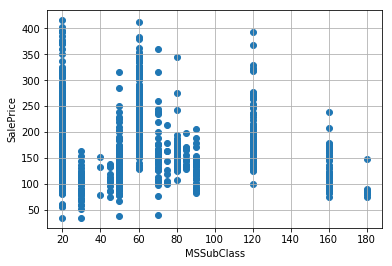

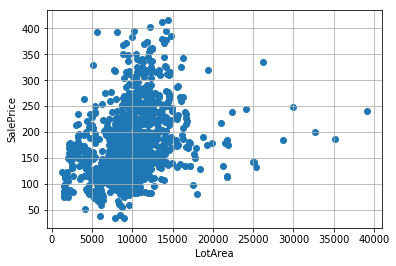

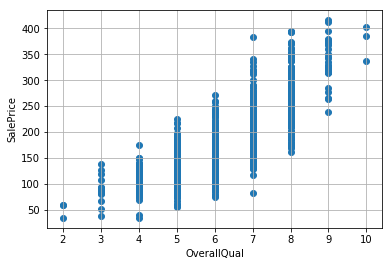

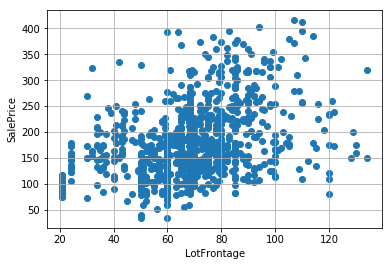

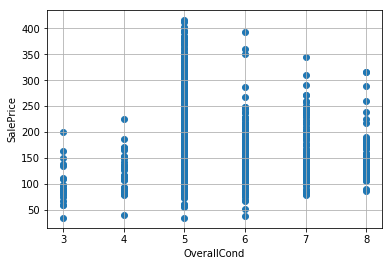

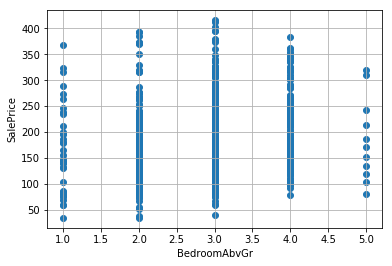

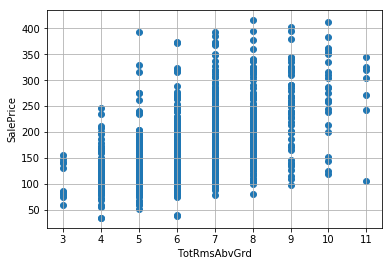

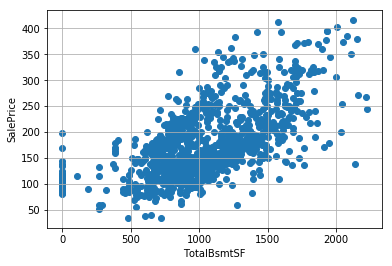

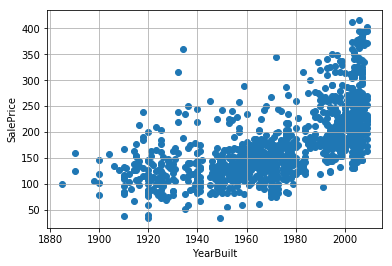

In [8]:
#now we want to show scatterplot of each 9 feature compare to SalePrice with matplotlib library
for col in X_train.columns:
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.scatter(data[col],price)
    plt.grid()
    plt.show()

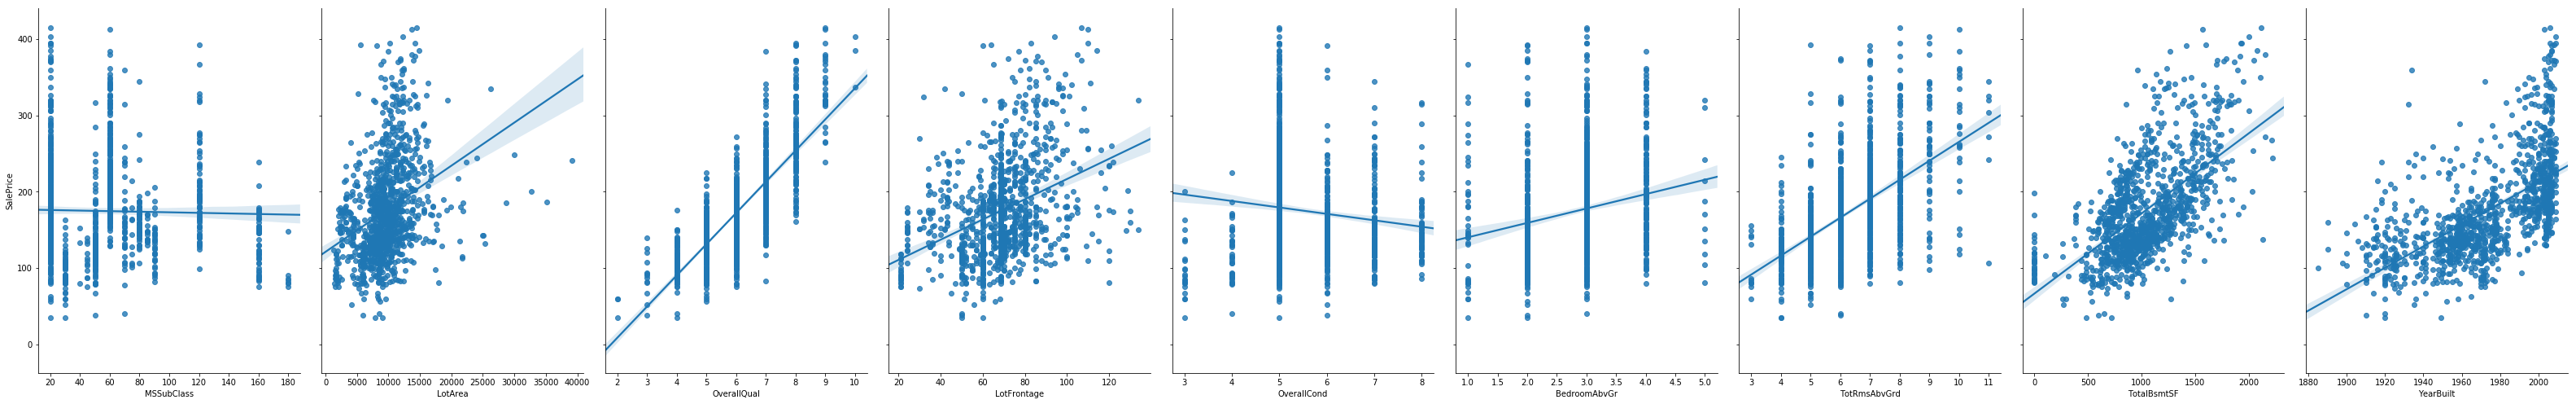

In [9]:
#also we can have
sns.pairplot(data, x_vars=['MSSubClass', 'LotArea', 'OverallQual', 'LotFrontage', 'OverallCond',
                         'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt' ], y_vars='SalePrice', height=7, aspect=0.7, kind='reg')

# Part B


In [10]:
def RMSE_calc_partb(y,feature_x):
    y_pred = linear_calc(feature_x)
    N = len(y)
    square_sum = 0
    for i in range(N):
        temp = (y_pred[i] - y[i])**2
        square_sum += temp
    square_sum /= N
    return float(square_sum**0.5)

y = price
feature_x = data['OverallQual']
y = np.array(y)
feature_x  = np.array(feature_x )


In [11]:
rmse =  RMSE_calc_partb(y,feature_x)
print("RMSE part b:",rmse)

('RMSE part b:', 38.55949518377027)


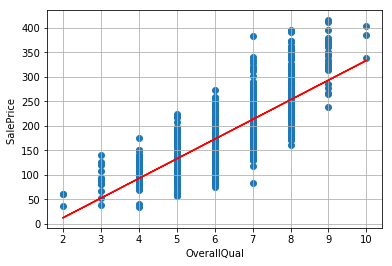

In [12]:
plt.xlabel('OverallQual')
plt.ylabel('SalePrice ')
plt.scatter(data['OverallQual'],price)
plt.plot(data['OverallQual'], 40.16235654 *data['OverallQual'] -68.35748451752235 , c='r' )
plt.grid()
plt.show()




# Part D

In [13]:
#In this part according to what we learn from numpy and panda library we 
#change code in part b that no for, while use

def RMSE_calc_partd(y,y_pred):
    y_pred = linear_calc(y_pred)
    return ((np.sum((y_pred - y)**2))/len(y))**.5

rmse =  RMSE_calc_partd(y,feature_x)
print("RMSE part d:",rmse)

('RMSE part d:', 38.559495183770274)


# Part E


In [14]:
#KNN function is a nonparametric model
#First standardalize dataset according to min and max of columns
#Then calculate distance
#select k smallest distancce
#return mean of them as estimate price

def predict_knn(input_df,train_data = X_train, k=10):
    maxx = train_data.max(axis=0)
    minn = train_data.min(axis=0)
    train_data = (train_data - minn)/(maxx-minn)
    input_df = (input_df - minn) / (maxx-minn)
    train_data['distance'] = train_data[['MSSubClass', 'LotArea', 'OverallQual', 'LotFrontage', 'OverallCond',
                         'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt' ]].sub(np.array(input_df)).pow(2).sum(1).pow(0.5)
    train_data['SalePrice'] = data['SalePrice']
    df = train_data.nsmallest(k, 'distance')
    return df['SalePrice'].mean()

#test data with sample row from datas

test_df = data.sample()
test_df_price = test_df['SalePrice']
print(test_df_price)
test_df = test_df.drop(['SalePrice','Id'],1)
print("estimated price KNN for a sample row in dataset:",predict_knn(test_df))


206    179.9
Name: SalePrice, dtype: float64
('estimated price KNN for a sample row in dataset:', 177.29000000000002)


In [15]:
columns = ['MSSubClass', 'LotArea', 'OverallQual', 'LotFrontage', 'OverallCond', 
           'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt']
row_data = [70,11435,8,67.66037735849056,7,3,7,792,1929]

singular_df = pd.DataFrame(data = [row_data], columns = columns)

# def predict_knn(house_data : pd.DataFrame) -> float:
# 	return 0. #implement your function here

print(predict_knn(singular_df))

173.51


In [16]:
#here calculate rmse with knn 
input_df = data.head(len(data))
df = input_df['SalePrice']
input_df = input_df.drop(['SalePrice','Id'],1)
input_df.head()

# y_preds = []
# for i in range(len(input_df)):
#     y_preds.append(predict_knn(pd.DataFrame(data
#                                              =[input_df.iloc[i].values], columns=input_df.columns)))

y_preds = np.array(input_df.apply(predict_knn,axis=1));



def RMSE_calc_parte(y,y_pred):
    return ((np.sum((y_pred - y)**2))/len(y))**.5

RMSE_calc_parte(df.values,y_preds)


25.19223810272189

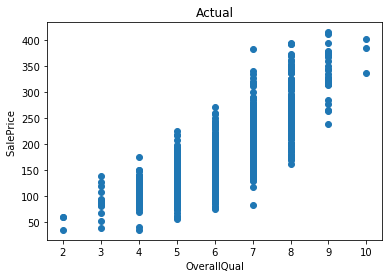

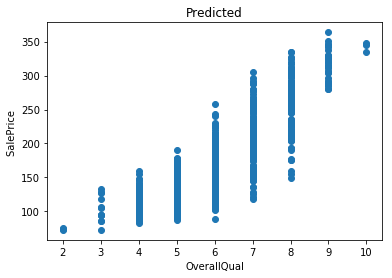

In [17]:



plt.xlabel('OverallQual')
plt.ylabel('SalePrice ')
plt.title('Actual')
plt.scatter(data['OverallQual'],price)
plt.show()

plt.xlabel('OverallQual')
plt.ylabel('SalePrice ')
plt.title('Predicted')
plt.scatter(data['OverallQual'],y_preds )
plt.show()

